In [1]:
import uproot
import numpy as np

import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import zfit
import math
import scipy
import matplotlib

from hepstats.hypotests.calculators import AsymptoticCalculator
from hepstats.hypotests.parameters  import POIarray, POI

In [4]:
cols = ['#CCCCCC', '#07A9FF', '#1A2A5B', '#FF9E21', '#149A9A', 'indianred', '#66283A', '#8A1859', '#BFC2C7',
        '#FFB0A8', '#B580CA', '#203769', '#909090', '#909090', '#83C369', '#FDED95', '#85F7C2', '#105D20',
        '#E77D4D', '#9D0008', '#EDDAB7', '#DCDCDC', '#DCDCDC', '#393939']

In [5]:
def find_zero_crossing(x, y):
    """
    Find the zero crossings of the spline interpolated function of y with respect to x.
    """
    tck = scipy.interpolate.splrep(x, y, s=0)
    return scipy.interpolate.sproot(tck)

def sci_notation(num, decimal_digits=1, precision=None, exponent=None):
    """
    Returns a string representation of the scientific
    notation of the given number formatted for use with
    LaTeX or Mathtext, with specified number of significant
    decimal digits and precision (number of decimal digits
    to show). The exponent to be used can also be specified
    explicitly.
    """
    if exponent is None:
        exponent = int(math.floor(math.log10(abs(num))))
    coeff = round(num / float(10 ** exponent), decimal_digits)
    if precision is None:
        precision = decimal_digits

    return r"{0:.{2}f}$\cdot$10$^{{{1:d}}}$".format(coeff, exponent, precision)

def set_border_line_width(ax: matplotlib.axes, lineWidth: float) -> None:
    """
    Utility function for getting the frame of an axis and setting the line width
    """
    [axis.set_linewidth(lineWidth) for axis in ax.spines.values()]

## SM 2nbb distribution

In [6]:
sm_2nbb_dist = np.loadtxt('/Users/romoluque_c/LEGEND/2nbb_distortions/Spectral_Effects_Fitting_Lars/L200_Spectral_Effects_Fitting/dist/standard_model/SM_2vbb_76Ge_sums.txt', usecols=(2), unpack=True)
sm_2nbb_dist = np.insert(sm_2nbb_dist, 0, 0, axis=0)

In [7]:
bins = np.arange(0, len(sm_2nbb_dist), 1)

## Right Handed Currents Spectra

In [8]:
basepath = '/Users/romoluque_c/LEGEND/2nbb_distortions/Spectral_Effects_Fitting_Lars/spectral_dist/'

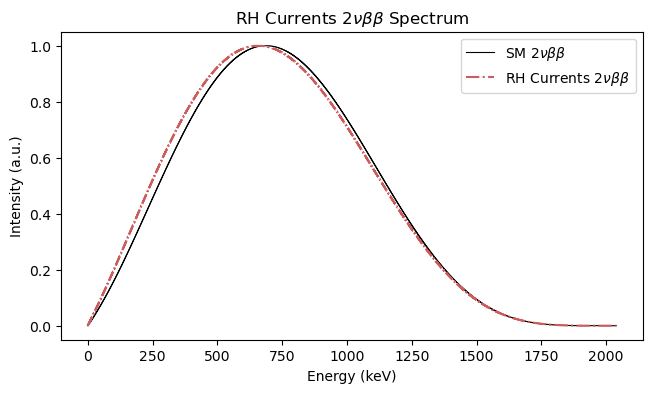

In [9]:
rh_curr_dist = np.loadtxt(basepath+'dist/rh_curr/Ge-RHC-Etot-distro-1kev-reinterpolated.dat', usecols=(1), unpack=True)
rh_curr_dist = np.insert(rh_curr_dist, 0, 0, axis=0)
rh_curr_dist = rh_curr_dist / np.sum(rh_curr_dist)

fig, ax = plt.subplots(figsize=(7.5, 4))
ax.step(bins, sm_2nbb_dist / np.max(sm_2nbb_dist), c='k',     lw=0.8,  label=r'SM 2$\nu\beta\beta$')
ax.step(bins, rh_curr_dist / np.max(rh_curr_dist), c=cols[5], ls='-.', label=r'RH Currents 2$\nu\beta\beta$', )
ax.set_xlabel('Energy (keV)')
ax.set_ylabel('Intensity (a.u.)')
ax.set_title(r'RH Currents 2$\nu\beta\beta$ Spectrum')
ax.legend()
plt.show()

# Sensitivity:

### L200 background data

In [11]:
data_path = '/Users/romoluque_c/LEGEND/2nbb_distortions/data_bckg_model/'

bckg_bins, tot_model = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_total_model.txt', usecols=(0,1), unpack=True, skiprows=1, delimiter=',')
alphas_model         = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_alphas.txt',      usecols=(1),   unpack=True, skiprows=1, delimiter=',')
co60_model           = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_Co60_chain.txt',  usecols=(1),   unpack=True, skiprows=1, delimiter=',')
k40_model            = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_K40_chain.txt',   usecols=(1),   unpack=True, skiprows=1, delimiter=',')
k42_model            = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_K42_chain.txt',   usecols=(1),   unpack=True, skiprows=1, delimiter=',')
vvBB_model           = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_Nvbb.txt',        usecols=(1),   unpack=True, skiprows=1, delimiter=',')
Th_model             = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_Th_chain.txt',    usecols=(1),   unpack=True, skiprows=1, delimiter=',')
U_model              = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_U_chain.txt',     usecols=(1),   unpack=True, skiprows=1, delimiter=',')
L200_actual_data     = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_fitted_data.txt', usecols=(1),   unpack=True, skiprows=1, delimiter=',')

# From Neutrino2024 talk
L200_data_exposure = 76.2 #kg * yr

######## Normalize by exposure
total_model      = tot_model        / L200_data_exposure
alphas_model     = alphas_model     / L200_data_exposure
co60_model       = co60_model       / L200_data_exposure
k40_model        = k40_model        / L200_data_exposure
k42_model        = k42_model        / L200_data_exposure
vvBB_model       = vvBB_model       / L200_data_exposure
Th_model         = Th_model         / L200_data_exposure
U_model          = U_model          / L200_data_exposure
L200_actual_data = L200_actual_data / L200_data_exposure

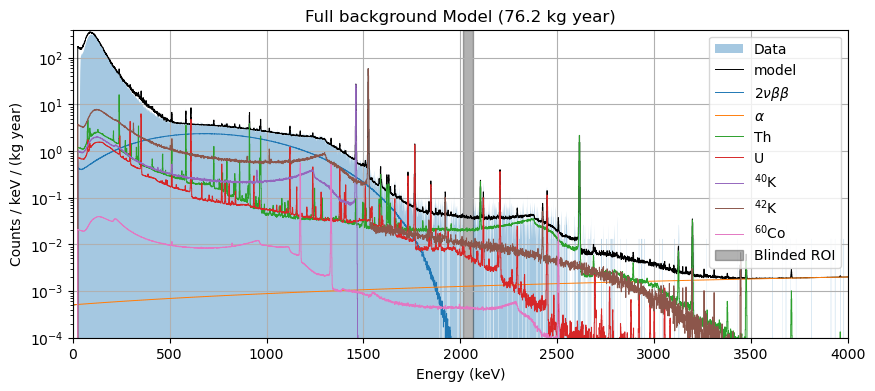

In [12]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.fill_between(bckg_bins, 0, L200_actual_data, label=r'Data', alpha=0.4)
#ax.step(bckg_bins, L200_actual_data, label=r'Data', alpha=0.3)
ax.step(bckg_bins, total_model,  where='post', lw=0.7, label='model', color='black')
ax.step(bckg_bins, vvBB_model,   where='post', lw=0.7, label=r'$2\nu\beta\beta$')
ax.step(bckg_bins, alphas_model, where='post', lw=0.7, label=r'$\alpha$')
ax.step(bckg_bins, Th_model,     where='post', lw=0.7, label=r'Th')
ax.step(bckg_bins, U_model,      where='post', lw=0.7, label=r'U')
ax.step(bckg_bins, k40_model,    where='post', lw=0.7, label=r'$^{40}$K')
ax.step(bckg_bins, k42_model,    where='post', lw=0.7, label=r'$^{42}$K')
ax.step(bckg_bins, co60_model,   where='post', lw=0.7, label=r'$^{60}$Co')

# Shade blinded ROI
qbb      = 2039 # keV
roi_ampl =   50 # keV
ax.axvspan(qbb - roi_ampl/2, qbb + roi_ampl/2, label=r'Blinded ROI', alpha=0.3, color='black')
ax.legend(loc='upper right')
ax.set_yscale('log')
ax.set_title(f'Full background Model ({L200_data_exposure} kg year)')
ax.set_ylabel('Counts / keV / (kg year)')
ax.set_xlabel('Energy (keV)')
ax.set_ylim(1e-4, 4e2)
ax.set_xlim(0, 4000)
ax.grid()
plt.show()

## Spectrum subtracting 2nbb:

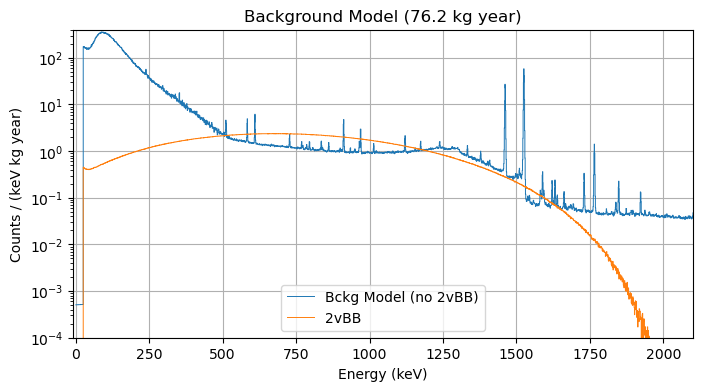

In [13]:
bckg_model = (total_model - vvBB_model)

fig, ax = plt.subplots(figsize=(8, 4))
ax.step(bckg_bins, bckg_model, where='post', lw=0.7, label='Bckg Model (no 2vBB)')
ax.step(bckg_bins, vvBB_model, where='post', lw=0.7, label='2vBB')
ax.set_yscale('log')
ax.set_ylim(1e-4, 4e2)
ax.set_title(f'Background Model ({L200_data_exposure} kg year)')
ax.set_ylabel("Counts / (keV kg year)")
ax.set_xlabel('Energy (keV)')
ax.set_xlim(-10, 2100)
ax.grid()
ax.legend()
plt.show()

## RH currents

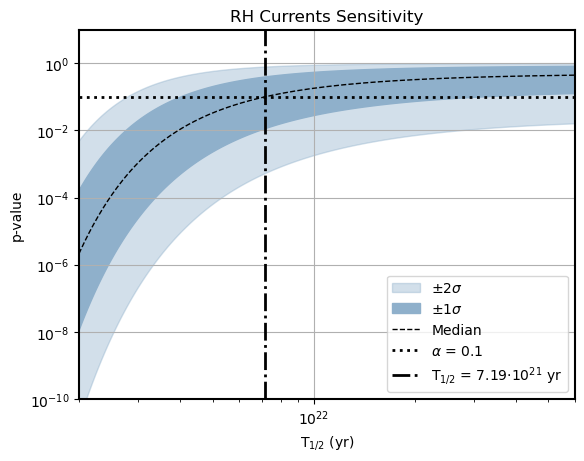

In [29]:
# Significance Level
alpha = 0.1

exposure = L200_data_exposure

# Efficiency. explain?
eff = 0.75

NA = 6.022141e23 # Avogadro's constant: atoms / mol
mA = 75.9214027e-3 # kg / mol of 76Ge

min_bin = 30
max_bin = 2010

# Input for fitting
signal_dist = rh_curr_dist
N_min       =   5000
N_max       = 220000

# ===========================================================================

# Cut the distribution in the fit range
limits  = (min_bin, max_bin + 1)
binning = max_bin + 1 - min_bin

bckg_model_fitrange = bckg_model[min_bin:max_bin + 1]
vvBB_model_fitrange = vvBB_model[min_bin:max_bin + 1]

# Calculate the number of background and 2vBB events
Nbckg = exposure * np.sum(bckg_model_fitrange)
NvvBB = exposure * np.sum(vvBB_model_fitrange)


# Setup zfit values
obs      = zfit.Space('E', limits=limits, binning=binning)
n_signal = zfit.Parameter('n_signal',   0, 0, step_size=0.01)
n_bckg   = zfit.Parameter('n_bckg', Nbckg, 0, step_size=0.01)
n_vvBB   = zfit.Parameter('n_2vBB', NvvBB, 0, step_size=0.01)

# Pdfs
bckg_model_pdf = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=bckg_model_fitrange), extended=n_bckg)
vvBB_pdf       = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=vvBB_model_fitrange), extended=n_vvBB)

signal_dist_fitrange = signal_dist[min_bin:max_bin + 1]
signal_fitrange_eff  = np.sum(signal_dist_fitrange) # sig_distribution already normalized to 1
signal_pdf           = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=signal_dist_fitrange), extended=n_signal)
# Model (signal + background)
# Since both signal_pdf and background_model_pdf are extended PDF's we should not specify the fraction of each PDF
model = zfit.pdf.BinnedSumPDF([signal_pdf, bckg_model_pdf, vvBB_pdf])

n_signal.set_value(0)
n_bckg  .set_value(Nbckg)
n_vvBB  .set_value(NvvBB)
real_data = zfit.data.BinnedData.from_tensor(space=obs, values=(exposure * L200_actual_data[min_bin: max_bin + 1]))

# In theory the 'subtr_const': True should offset the loss function closer to 0. In practice the opposite is true.
# After perusing the source code (https://zfit.readthedocs.io/en/v0.18.1/_modules/zfit/core/loss.html)
# I see zfit is calculating `log_offset = (NLL - 10000) / nEventsTot` which is completely bogus for a binned fit
# zfit should be using `log_offset = NLL / binning` because binning is the amount of bins we are actually fitting
# In fact the loss function L is defined (https://zfit.readthedocs.io/en/stable/user_api/_generated/loss/zfit.loss.ExtendedBinnedNLL.html#extendedbinnednll)
# as a product over the bins, so NLL will be O(binning) and not O(nEventsTot). So the calculated log_offset is bogus - Lars, June 24, 2024
# nll = zfit.loss.ExtendedBinnedNLL(model, zfit.data.BinnedData.from_tensor(space=obs, values=model.counts()), options = {'subtr_const' : False})
nll       = zfit.loss.ExtendedBinnedNLL(model, real_data, options={'subtr_const' : False})
minimizer = zfit.minimize.Minuit(verbosity=0)

# Perturb n_signal away from 0 to get out of a local minimum at 0
# Even when n_signal for the fake_data != 0 the fitting gets stuck there for some reason
# This only happens sometimes, and more often when I don't bound n_signal, n_background > 0
n_signal.set_value(1)
n_bckg  .set_value(Nbckg)
n_vvBB  .set_value(NvvBB)

result = minimizer.minimize(nll)
result.hesse(name = 'hesse_np')

calculator = AsymptoticCalculator(input=result, minimizer=minimizer)

# https://hepstats.readthedocs.io/en/v0.6.1/getting_started/hypotests.html - Lars
n_signal_hypot_vals = np.linspace(N_min, N_max, 200)

poialt   = POI(n_signal, 0) # Background only
poinull  = POIarray(n_signal, n_signal_hypot_vals) # Background + signal
expected = calculator.expected_pvalue(poinull, poialt, nsigma=[0, -1, 1, -2, 2])

full_spec_cts      = n_signal_hypot_vals / signal_fitrange_eff
real_full_spec_cts = full_spec_cts / eff
half_life          = (NA / mA) * (math.log(2) / real_full_spec_cts) * exposure
inv_half_life      = 1 / half_life

# Calculate sensitivity
n_signal_sens           = find_zero_crossing(n_signal_hypot_vals, expected[0] - alpha)[0]
n_signal_full_spec_sens = n_signal_sens / signal_fitrange_eff
real_full_spec_sens     = n_signal_full_spec_sens / eff
half_life_sens          = (NA / mA) * (math.log(2) / real_full_spec_sens) * exposure
inv_half_life_sens      = 1 / half_life_sens

fig, ax = plt.subplots()
ax.fill_between(half_life, expected[3], expected[4], color='#8FB0CB', label=r'$\pm 2\sigma$', alpha=0.4)
ax.fill_between(half_life, expected[1], expected[2], color='#8FB0CB', label=r'$\pm 1\sigma$')
ax.plot(half_life, expected[0], c='black', lw=1, ls='dashed', label='Median')
ax.axhline(alpha,          lw=2, ls='dotted',  color='black', label=r'$\alpha$ = ' + str(alpha))
ax.axvline(half_life_sens, lw=2, ls='dashdot', color='black', label='T$_{1/2}$ = ' + sci_notation(half_life_sens, precision=2, decimal_digits=2) + ' yr')
set_border_line_width(ax, 1.5)
ax.set_title('RH Currents Sensitivity')
ax.set_xlabel(r'T$_{1/2}$ (yr)')
ax.set_ylabel('p-value')
#ax.set_xlim(min(half_life), max(half_life))
ax.set_xlim(2e21, 6e22)
ax.set_ylim(1e-10, 10)
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='lower right')
ax.grid()
#fig.savefig('./images/rh_curr.pdf', bbox_inches='tight')
plt.show()

## Energy range = (500, 2010) keV

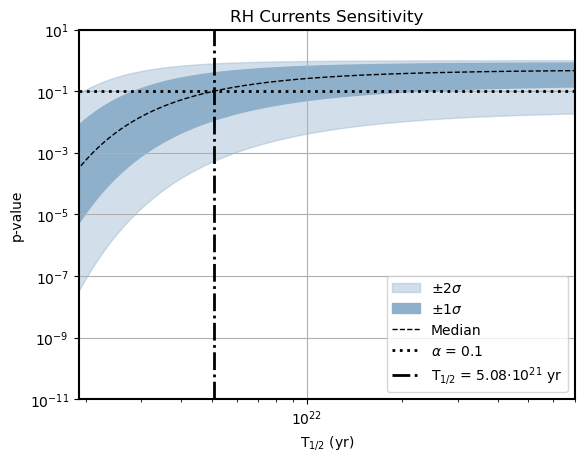

In [38]:
# Significance Level
alpha = 0.1

exposure = L200_data_exposure

# Efficiency. explain?
eff = 0.75

NA = 6.022141e23 # Avogadro's constant: atoms / mol
mA = 75.9214027e-3 # kg / mol of 76Ge

min_bin =  500
max_bin = 2010

# Input for fitting
signal_dist = rh_curr_dist
N_min       =   2000
N_max       = 300000

# ===========================================================================

# Cut the distribution in the fit range
limits  = (min_bin, max_bin + 1)
binning = max_bin + 1 - min_bin

bckg_model_fitrange = bckg_model[min_bin:max_bin + 1]
vvBB_model_fitrange = vvBB_model[min_bin:max_bin + 1]

# Calculate the number of background and 2vBB events
Nbckg = exposure * np.sum(bckg_model_fitrange)
NvvBB = exposure * np.sum(vvBB_model_fitrange)

obs      = zfit.Space('E', limits=limits, binning=binning)
n_signal = zfit.Parameter('n_signal',   0, 0, step_size=0.01)
n_bckg   = zfit.Parameter('n_bckg', Nbckg, 0, step_size=0.01)
n_vvBB   = zfit.Parameter('n_2vBB', NvvBB, 0, step_size=0.01)

# Pdfs
bckg_model_pdf = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=bckg_model_fitrange), extended=n_bckg)
vvBB_pdf       = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=vvBB_model_fitrange), extended=n_vvBB)

signal_dist_fitrange = signal_dist[min_bin:max_bin + 1]
signal_fitrange_eff  = np.sum(signal_dist_fitrange) # sig_distribution already normalized to 1
signal_pdf           = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=signal_dist_fitrange), extended=n_signal)
# Model (signal + background)
# Since both signal_pdf and background_model_pdf are extended PDF's we should not specify the fraction of each PDF
model = zfit.pdf.BinnedSumPDF([signal_pdf, bckg_model_pdf, vvBB_pdf])

n_signal.set_value(0)
n_bckg  .set_value(Nbckg)
n_vvBB  .set_value(NvvBB)
real_data = zfit.data.BinnedData.from_tensor(space=obs, values=(exposure * L200_actual_data[min_bin: max_bin + 1]))

nll       = zfit.loss.ExtendedBinnedNLL(model, real_data, options={'subtr_const' : False})
minimizer = zfit.minimize.Minuit(verbosity=0)

n_signal.set_value(1)
n_bckg  .set_value(Nbckg)
n_vvBB  .set_value(NvvBB)

result = minimizer.minimize(nll)
result.hesse(name = 'hesse_np')

calculator = AsymptoticCalculator(input=result, minimizer=minimizer)

# https://hepstats.readthedocs.io/en/v0.6.1/getting_started/hypotests.html - Lars
n_signal_hypot_vals = np.linspace(N_min, N_max, 200)

poialt   = POI(n_signal, 0) # Background only
poinull  = POIarray(n_signal, n_signal_hypot_vals) # Background + signal
expected = calculator.expected_pvalue(poinull, poialt, nsigma=[0, -1, 1, -2, 2])

full_spec_cts      = n_signal_hypot_vals / signal_fitrange_eff
real_full_spec_cts = full_spec_cts / eff
half_life          = (NA / mA) * (math.log(2) / real_full_spec_cts) * exposure
inv_half_life      = 1 / half_life

# Calculate sensitivity
n_signal_sens           = find_zero_crossing(n_signal_hypot_vals, expected[0] - alpha)[0]
n_signal_full_spec_sens = n_signal_sens / signal_fitrange_eff
real_full_spec_sens     = n_signal_full_spec_sens / eff
half_life_sens          = (NA / mA) * (math.log(2) / real_full_spec_sens) * exposure
inv_half_life_sens      = 1 / half_life_sens

fig, ax = plt.subplots()
ax.fill_between(half_life, expected[3], expected[4], color='#8FB0CB', label=r'$\pm 2\sigma$', alpha=0.4)
ax.fill_between(half_life, expected[1], expected[2], color='#8FB0CB', label=r'$\pm 1\sigma$')
ax.plot(half_life, expected[0], c='black', lw=1, ls='dashed', label='Median')
ax.axhline(alpha,          lw=2, ls='dotted',  color='black', label=r'$\alpha$ = ' + str(alpha))
ax.axvline(half_life_sens, lw=2, ls='dashdot', color='black', label='T$_{1/2}$ = ' + sci_notation(half_life_sens, precision=2, decimal_digits=2) + ' yr')
set_border_line_width(ax, 1.5)
ax.set_title('RH Currents Sensitivity')
ax.set_xlabel(r'T$_{1/2}$ (yr)')
ax.set_ylabel('p-value')
ax.set_xlim(1.9e21, 7e22)
ax.set_ylim(1e-11, 10)
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='lower right')
ax.grid()
fig.savefig('./images/rh_curr_min_bin_500keV.pdf', bbox_inches='tight')
plt.show()